<a href="https://colab.research.google.com/github/yutaro-tanaka-yt2705/ag-cgan/blob/main/4_evaluation_of_synthesized_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Import our libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import gzip
import sys
import warnings

##0. Import Data

In [13]:
#Import real data
real_data = pd.read_csv('/content/drive/MyDrive/artificial_genome_project/test_dataset.csv')
real_data.head()

,ID,pair,X_1343510_CA_C,X_2464340_G_A,X_844565_T_G,X_1443587_C_T,X_846946_A_G,X_155783945_C_T,X_2348441_C_T,X_1495791_C_G,...,X_1494970_G_A,X_2272724_A_C,X_2441570_T_C,X_1420810_T_C,X_719380_A_G,X_1115457_A_G,X_2449045_T_C,X_1165297_A_G,population_code,suppop_code
0,HG00096,A,0,0,0,1,0,1,1,1,...,0,1,0,0,0,0,0,1,10.0,3.0
1,HG00096,B,0,0,1,1,1,1,0,1,...,0,1,0,0,0,1,0,0,10.0,3.0
2,HG00097,A,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,10.0,3.0
3,HG00097,B,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,1,0,10.0,3.0
4,HG00099,A,0,0,1,1,1,1,0,0,...,0,1,1,1,0,0,1,0,10.0,3.0


In [14]:
real_data.suppop_code.value_counts()

0.0    1342
3.0    1044
2.0    1030
4.0     984
1.0     696
Name: suppop_code, dtype: int64

In [15]:
pop_code_df = pd.read_csv('/content/drive/MyDrive/artificial_genome_project/population_code_table.csv')
pop_code_df['population_code'] = pop_code_df['population_code'].apply(lambda x: str(x).split('.')[0])
pop_code_df['suppop_code'] = pop_code_df['suppop_code'].apply(lambda x: str(x).split('.')[0])
pop_code_df.head()

,population_code,Population code,suppop_code,Superpopulation code
0,9,FIN,3,EUR
1,6,CHS,2,EAS
2,10,GBR,3,EUR
3,22,PUR,1,AMR
4,3,CDX,2,EAS


In [16]:
pop_code_df['Superpopulation code'].unique()

array(['EUR', 'EAS', 'AMR', 'SAS', 'AFR'], dtype=object)

In [18]:
#Import baseline (CTGAN) data
baseline_data = pd.read_csv('/content/drive/MyDrive/artificial_genome_project/baseline_synthesized_dataset.csv')
baseline_data['population_code'] = baseline_data['population_code'].apply(lambda x: str(x).split('.')[0])
baseline_data['suppop_code'] = baseline_data['suppop_code'].apply(lambda x: str(x).split('.')[0])
baseline_data.head()

,X_1343510_CA_C,X_2464340_G_A,X_844565_T_G,X_1443587_C_T,X_846946_A_G,X_155783945_C_T,X_2348441_C_T,X_1495791_C_G,X_2452743_G_T,X_844299_C_T,...,X_1494970_G_A,X_2272724_A_C,X_2441570_T_C,X_1420810_T_C,X_719380_A_G,X_1115457_A_G,X_2449045_T_C,X_1165297_A_G,population_code,suppop_code
0,1,0,1,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,17,2
1,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,16,0
2,0,0,1,1,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,9,2
3,0,0,0,1,1,1,0,1,0,0,...,1,0,1,0,0,0,0,0,21,1
4,0,0,1,1,1,1,0,0,1,0,...,1,0,1,1,1,1,0,0,7,3


In [19]:
#Import generated_data
generated_data = pd.read_csv('/content/drive/MyDrive/artificial_genome_project/artificial_data/artificial_genomes_processed.csv')
generated_data.head()

,X_1343510_CA_C,X_2464340_G_A,X_844565_T_G,X_1443587_C_T,X_846946_A_G,X_155783945_C_T,X_2348441_C_T,X_1495791_C_G,X_2452743_G_T,X_844299_C_T,...,X_1494541_A_G,X_1494970_G_A,X_2272724_A_C,X_2441570_T_C,X_1420810_T_C,X_719380_A_G,X_1115457_A_G,X_2449045_T_C,X_1165297_A_G,suppop_code
0,0,1,1,0,0,1,0,0,1,1,...,1,0,1,1,1,1,1,1,1,0.0
1,0,1,0,0,0,0,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1.0
2,1,0,1,0,1,1,1,0,0,0,...,0,1,1,1,1,0,1,0,1,2.0
3,1,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,3.0
4,0,1,0,0,1,0,1,0,1,0,...,0,1,1,1,0,1,0,0,1,4.0


# Use PCA/UMAP to obtain dimension reduction results

## 1. PCA Analysis

In [20]:
from sklearn.decomposition import PCA

### 1.1 Real data

In [ ]:
#Real Data PCA
x = real_data.iloc[:, 2:-2].values
y = real_data.iloc[:, -1].values

pca = PCA(n_components=2)
pc_val = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_val, columns = ['pc_1', 'pc_2'])
#pc_y_df = pd.concat([pc_df, real_data[['population_code']]], axis = 1)
pc_y_df = pd.concat([pc_df, real_data[['suppop_code']]], axis = 1)

In [ ]:
real_data['suppop_code'] = real_data['suppop_code'].astype(str)

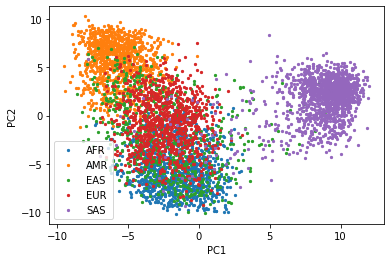

In [ ]:
targets = real_data['suppop_code'].unique().tolist()
for target in targets:
  tar_indices = pc_y_df['suppop_code'] == str(target)
  plt.scatter(pc_y_df.loc[tar_indices, 'pc_1'],
              pc_y_df.loc[tar_indices, 'pc_2'],
              label = target,
              s = 5         
              )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

### 1.2 Baseline data

In [ ]:
#Baseline Data PCA
base_x = baseline_data.iloc[:, :-4].values
base_y = baseline_data.iloc[:, -2].values

In [ ]:
base_pca = PCA(n_components=2)
base_pc_val = pca.fit_transform(base_x)
base_pc_df = pd.DataFrame(data = base_pc_val, columns = ['pc_1', 'pc_2'])
base_pc_y_df = pd.concat([base_pc_df, baseline_data[['suppop_code']]], axis = 1)

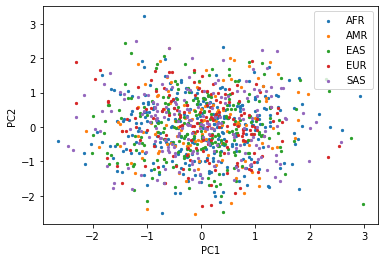

In [ ]:
for i in range(5):
  tar_indices = base_pc_y_df['suppop_code'] == str(i)
  plt.scatter(base_pc_y_df.loc[tar_indices, 'pc_1'],
              base_pc_y_df.loc[tar_indices, 'pc_2'],
              label = i,
              s = 5         
              )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

### 1.3 Generated Data

In [ ]:
#Generated Data PCA
x = generated_data.iloc[:, :-1].values
y = generated_data.iloc[:, -1].values

pca = PCA(n_components=2)
pc_val = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_val, columns = ['pc_1', 'pc_2'])
pc_y_df = pd.concat([pc_df, generated_data[['suppop_code']]], axis = 1)

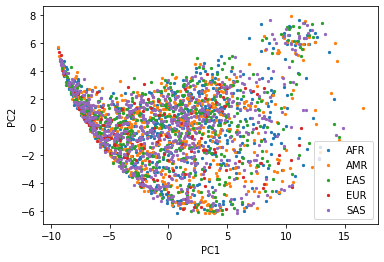

In [ ]:
targets = generated_data['suppop_code'].unique().tolist()
for target in targets:
  tar_indices = pc_y_df['suppop_code'] == str(target)
  plt.scatter(pc_y_df.loc[tar_indices, 'pc_1'],
              pc_y_df.loc[tar_indices, 'pc_2'],
              label = target,
              s = 5         
              )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

## 2. t-SNE (need to implement)

In [10]:
from sklearn.manifold import TSNE

100%|██████████| 5/5 [00:00<00:00, 73.34it/s]


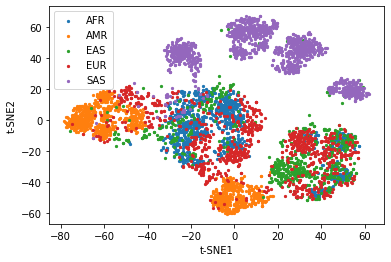

In [27]:
#real data
n_components = 2
tsne = TSNE(n_components)
x = real_data.iloc[:, 2:-1].values
y = real_data.iloc[:, -1].values
tsne_result = tsne.fit_transform(x)

pc_df = pd.DataFrame(data = tsne_result, columns = ['tsne_1', 'tsne_2'])
pc_y_df = pd.concat([pc_df, real_data.iloc[:, -1]], axis = 1)
targets = real_data.iloc[:, -1].unique().tolist()
for target in tqdm(targets):
  tar_indices = pc_y_df['suppop_code'] == (target)
  plt.scatter(pc_y_df.loc[tar_indices, 'tsne_1'],
              pc_y_df.loc[tar_indices, 'tsne_2'],
              label = target,
              s = 5         
              )
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 5/5 [00:00<00:00, 171.04it/s]


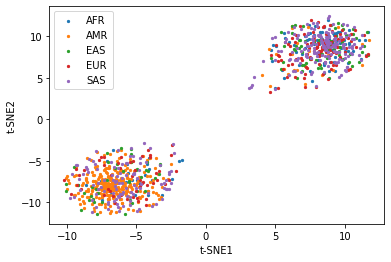

In [28]:
#baseline data
n_components = 2
tsne = TSNE(n_components)
x = baseline_data.iloc[:, 2:-2].values
y = baseline_data.iloc[:, -1].values
tsne_result = tsne.fit_transform(x)

pc_df = pd.DataFrame(data = tsne_result, columns = ['tsne_1', 'tsne_2'])
pc_y_df = pd.concat([pc_df, baseline_data.iloc[:, -1]], axis = 1)
targets = baseline_data.iloc[:, -1].unique().tolist()
for target in tqdm(targets):
  tar_indices = pc_y_df['suppop_code'] == (target)
  plt.scatter(pc_y_df.loc[tar_indices, 'tsne_1'],
              pc_y_df.loc[tar_indices, 'tsne_2'],
              label = target,
              s = 5         
              )
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 5/5 [00:00<00:00, 159.94it/s]


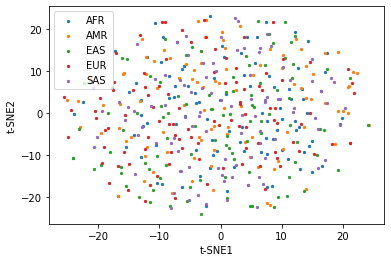

In [29]:
#generated data
n_components = 2
tsne = TSNE(n_components)
x = generated_data.iloc[:, :-1].values
y = generated_data.iloc[:, -1].values
tsne_result = tsne.fit_transform(x)

pc_df = pd.DataFrame(data = tsne_result, columns = ['tsne_1', 'tsne_2'])
pc_y_df = pd.concat([pc_df, generated_data.iloc[:, -1]], axis = 1)
targets = generated_data.iloc[:, -1].unique().tolist()
for target in tqdm(targets):
  tar_indices = pc_y_df['suppop_code'] == (target)
  plt.scatter(pc_y_df.loc[tar_indices, 'tsne_1'],
              pc_y_df.loc[tar_indices, 'tsne_2'],
              label = target,
              s = 5         
              )
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
plt.show()

# Train classifiers trained on different datasets (varying degrees of synthesized samples included) and compare performance

In [ ]:
##TODO